# Setup the execution environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%cd /home/super/source/finance_scrapy
# %pwd

/home/super/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


/home/super/source/finance_scrapy


In [45]:
"""This cell defineds the plot_candles function"""
"""https://www.quantopian.com/posts/plot-candlestick-charts-in-research"""

def plot_candles(pricing, title=None, volume_bars=False, color_function=None, technicals=None):
    """ Plots a candlestick chart using quantopian pricing data.
    
    Author: Daniel Treiman
    
    Args:
      pricing: A pandas dataframe with columns ['open', 'close', 'high', 'low', 'volume']
      title: An optional title for the chart
      volume_bars: If True, plots volume bars
      color_function: A function which, given a row index and price series, returns a candle color.
      technicals: A list of additional data series to add to the chart.  Must be the same length as pricing.
    """
    def default_color(index, open_price, close_price, low_price, high_price):
        return 'r' if open_price[index] > close_price[index] else 'g'
    
    color_function = color_function or default_color
    technicals = technicals or []
    open_price = pricing['open']
    close_price = pricing['close']
    low_price = pricing['low']
    high_price = pricing['high']
    oc = pd.concat([open_price, close_price], axis=1)
    oc_min = oc.min(axis=1)
    oc_max = oc.max(axis=1)

#     plt.figure(figsize=(30, 25))
#     ax = plt.subplot(111)

    if volume_bars:
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3,1]})
    else:
        fig, ax1 = plt.subplots(1, 1)
    if title:
        ax1.set_title(title)

    x = np.arange(len(pricing))
    candle_colors = [color_function(i, open_price, close_price, low_price, high_price) for i in x]
    candles = ax1.bar(x, oc_max-oc_min, bottom=oc_min, color=candle_colors, linewidth=0)
    lines = ax1.vlines(x + 0.4, low_price, high_price, color=candle_colors, linewidth=1)
    ax1.xaxis.grid(False)
    ax1.xaxis.set_tick_params(which='major', length=3.0, direction='in', top='off')
    # Assume minute frequency if first two bars are in the same day.
    frequency = 'minute' if (pricing.index[1] - pricing.index[0]).days == 0 else 'day'
    time_format = '%Y-%m-%d'
    if frequency == 'minute':
        time_format = '%H:%M'
    # Set X axis tick labels.
# type(pricing.index): <class 'pandas.tseries.index.DatetimeIndex'>
# type(pricing.index[0]): <class 'pandas.tslib.Timestamp'>
# Only mark the xtick of Monday
    [x_tick, x_tick_lable] = zip(*[(x[index], date.strftime(time_format)) for index, date in enumerate(pricing.index) if date.weekday() == 0])
    plt.xticks(x_tick, x_tick_lable, rotation='vertical')
#     plt.xticks(x, [date.strftime(time_format) for date in pricing.index], rotation='vertical')
    for indicator in technicals:
        ax1.plot(x, indicator)
    
    if volume_bars:
        volume = pricing['volume']
        volume_scale = None
        scaled_volume = volume
        if volume.max() > 1000000:
            volume_scale = 'M'
            scaled_volume = volume / 1000000
        elif volume.max() > 1000:
            volume_scale = 'K'
            scaled_volume = volume / 1000
        ax2.bar(x, scaled_volume, color=candle_colors)
        volume_title = 'Volume'
        if volume_scale:
            volume_title = 'Volume (%s)' % volume_scale
        ax2.set_title(volume_title)
        ax2.xaxis.grid(False)

In [51]:
%run finance_analysis.py -v
df.rename(columns={'0903': 'open', '0904': 'high', '0905': 'low', '0906': 'close', '0908': 'volume'}, inplace=True)
df.head()

*** Time Period ***
2017-10-02 - 2018-05-14
*** Column Mapping ***
0901: 成交股數
0902: 成交金額
0903: 開盤價
0904: 最高價
0905: 最低價
0906: 收盤價
0907: 漲跌價差
0908: 成交筆數


,0901,0902,open,high,low,close,0907,volume
date,,,,,,,,
2017-10-02,1328711,14532447,11.00,11.00,10.90,10.90,0.00,389
2017-10-03,1844064,20080942,10.95,11.00,10.80,10.90,0.00,397
2017-10-05,5254308,57400488,10.90,11.10,10.75,11.05,0.15,1059
2017-10-06,2443256,26787784,11.10,11.10,10.90,10.95,-0.10,533
2017-10-11,8882369,100081479,11.30,11.45,11.10,11.20,0.25,1697


In [48]:
open_price = df['open']
close_price = df['close']

# data = pd.concat([open_price, close_price], axis=1)
# data_min = data.min(axis=1)

x = np.arange(len(df))
time_format = '%Y-%m-%d'
x_tick_list = [(x[index], date.strftime(time_format)) for index, date in enumerate(df.index) if date.weekday() == 0]
print type(df.index)
print type(df.index[0])
# x_tick_list = [(date.weekday, date.strftime(time_format)) for index, date in enumerate(df.index)]

# x_tick_list
# oc_min = pd.concat([open_price, close_price], axis=1).min(axis=1)
# oc_max = pd.concat([open_price, close_price], axis=1).max(axis=1)

<class 'pandas.tseries.index.DatetimeIndex'>
<class 'pandas.tslib.Timestamp'>


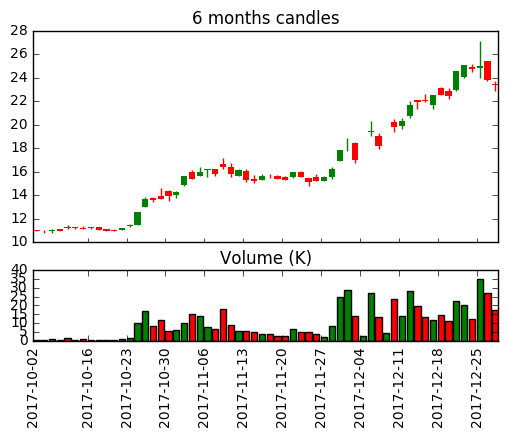

In [52]:
plot_candles(df[:60], title='6 months candles', volume_bars=True)

In [53]:
plt.show()
plt.plot(df['0005'])

KeyError: '0005'

In [7]:
df.head()
df_drop = df.drop('0005',axis=1)
df_drop.head()
df_drop.iloc[0:5]

,0703,0704,0707,0708,0712,0713,0716,0717
date,,,,,,,,
2014-01-02,32221,49.0,30893,47.0,33316,44.2,31688,42.0
2014-01-03,29668,45.2,31555,48.1,31168,40.8,33085,43.3
2014-01-06,28050,43.8,29830,46.5,30103,39.7,32094,42.3
2014-01-07,28801,44.2,30396,46.6,30487,38.7,33928,43.1
2014-01-08,27142,43.0,29973,47.5,29089,37.3,33859,43.4


In [51]:
type(df_drop.iloc[0:3].sum())

pandas.core.series.Series

In [68]:
def accumulate(df, accumulate_cnt):
#     accumulate_cnt = 3
    start_index = accumulate_cnt - 1
    cur_index = start_index 
    accumulate_df = pd.DataFrame(index=df.index[start_index:], columns=df.columns)
    for index in range(len(accumulate_df)):
        accumulate_df.iloc[index] = df.iloc[index:index+accumulate_cnt].sum()
    accumulate_df
    return accumulate_df
accumulate_cnt = 20
accumulate_df = accumulate(df.drop('0005',axis=1), accumulate_cnt)
accumulate_df['0005'] = df['0005'].iloc[accumulate_cnt-1:]
accumulate_df.head()
# accumulate_cnt = 3
# cur_index = accumulate_cnt
# for index, row in df_drop[accumulate_cnt:].iterrows():
#     accumulate_sum = df[cur_index:cur_index+accumulate_cnt].sum()
#     print(index, accumulate_sum['0005'])
#     cur_index += 1

,0103,0106,0109,0112,total,0005
date,,,,,,
2014-12-26,1909108636,1843429221,-6927044009,-57354364694,-60528870846,55.37
2014-12-27,1991152806,2214395353,-7036829143,-52138430707,-54969711691,4.43
2014-12-29,2211624712,4084193265,-4927808876,-33119737182,-31751728081,67.78
2014-12-30,1409485515,145379469,-4840746820,-29815171225,-33101053061,-17.85
2014-12-31,1338871606,-1622033707,-6009633901,-35009619808,-41302415810,38.83


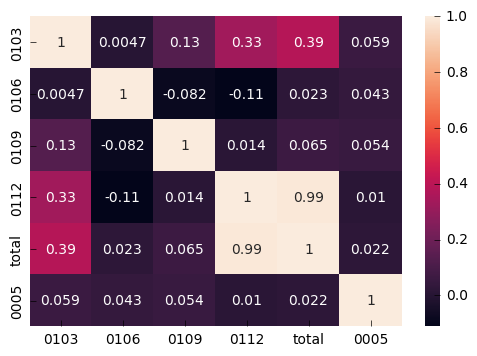

In [69]:
sns.heatmap(accumulate_df.corr(), annot=True)